<IPython.core.display.Javascript object>

# Data Pre-processing

Dans cette partie nous allons continuer notre analyse du Dataset, en faisant un pres-traitement simple et rapid des données. Cette etape est indispensable car elle nous permet d'établir une stratégie de prétraitement des données – autrement appelé Data Preprocessing – à partir de nos données brutes pour arriver à des données exploitables et qui nous donneront un modèle plus performant. 

In [60]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [62]:
# Importer des outils dont nous avons besoin 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [63]:
# Lecture et affichage du dataset
full_path_directory = os.path.realpath(os.path.dirname('__file__'))
csv_name = 'data/data_v1.0.csv' 
data = pd.read_csv(os.path.join(full_path_directory, csv_name))
data.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


# PRE-PROCESSING

In [64]:
# Souvent utile de travailler avec un copie de la dataset original
df = data.copy()
df.head()

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


## Création des sous-ensembles (suite au EDA)

In [66]:
# Jeter un coup d'œil au pourcentage de valeurs non définies 'None'
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

Unnamed: 0    0.00000
index         0.00000
date          0.00455
cheveux       0.00515
age           0.00455
exp           0.00480
salaire       0.00475
sexe          0.00500
diplome       0.00550
specialite    0.00465
note          0.00570
dispo         0.00530
embauche      0.00000
dtype: float64

In [67]:
# Extraire seulement les featurs que nous avons estimés importantes dans le notebook "Exploratory_Data_Analysis.ipynb" 
key_columns = df.columns.drop(['Unnamed: 0', 'index', 'date', 'cheveux'])
df = df[key_columns]
df.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,35.0,6.0,28533.0,F,licence,detective,81.91,non,0


## TrainTest - Nettoyage - Encodage

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# 80% de données de train et 20% pour les données de test
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [70]:
trainset['embauche'].value_counts()

0    14152
1     1848
Name: embauche, dtype: int64

In [71]:
testset['embauche'].value_counts()

0    3556
1     444
Name: embauche, dtype: int64

In [14]:
def encodage(df):
    """
    Encoder les colonnes de type Object
    """
    code = {'non':0, 'oui':1,
            'bac':0, 'licence':1,'master':2, 'doctorat':3,
            'geologie':0, 'forage':1, 'detective':2, 'archeologie':3,
            'F':0, 'M':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [22]:
# def feature_engineering(df):
#     df['est malade'] = df[viral_columns].sum(axis=1) >= 1
#     df = df.drop(viral_columns, axis=1)
#     return df


In [23]:
def imputation(df):
    # df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    # remplire toutes les valeur manquante avec une valeur extrème
    # df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [24]:
def preprocessing(df):
    
    df = encodage(df)
    # df = feature_engineering(df)
    df = imputation(df)
    
    y = df['embauche']
    X = df.drop('embauche', axis=1)
    
    print(y.value_counts())
    
    return X, y

In [25]:
X_train, y_train = preprocessing(trainset)

0    13576
1     1772
Name: embauche, dtype: int64


In [26]:
X_test, y_test = preprocessing(testset)

0    3428
1     431
Name: embauche, dtype: int64


In [27]:
trainset.head(), testset.head()

(        age   exp  salaire  sexe  diplome  specialite   note  dispo  embauche
 17815  35.0   4.0  31962.0   1.0      2.0         0.0  67.97    0.0         0
 18370  47.0  11.0  38712.0   1.0      1.0         0.0  59.58    0.0         0
 1379   25.0  12.0  36379.0   0.0      1.0         1.0  66.00    0.0         0
 14763  51.0   9.0  39712.0   1.0      1.0         0.0  55.95    0.0         0
 7346   50.0  11.0  43528.0   0.0      1.0         3.0  63.92    0.0         1,
         age   exp  salaire  sexe  diplome  specialite    note  dispo  embauche
 19134  32.0   7.0  32385.0   1.0      2.0         2.0  103.53    1.0         0
 4981   30.0  10.0  28249.0   0.0      0.0         3.0   63.01    0.0         1
 16643  41.0  10.0  33342.0   1.0      2.0         0.0  110.73    1.0         0
 19117  37.0   9.0  38237.0   0.0      2.0         1.0   78.32    0.0         0
 5306   42.0   6.0  42459.0   1.0      2.0         2.0   64.59    1.0         0)

## Modellisation

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [55]:
# Je préfére en générale de cree un arbre de décision dans premier temps car ce sont
# des modèles (très rapide, faciles à comprendre, très utilent pour diagnostiquer
# diagnostiquer un modèle (variables importantent...))
# Dans un premier temps on entraine avec les paramètre par defaut du classifier
# Puis nous pouvouvant prendre deds decision par la suite pour améliorer ce 
# dernier

# Jai opter pour la métrique f1 car c'est une très bonne metrique pour avoir un bon
# appercue entre le rapport precision et rappel/recall/secipilité
# Précision et le recole ce sont des métriques qui nous permetent de meusurer 
# les proportion d'erreur de type 1 et 2 dans notre dataset, càd:
# Les proportion de faut positif et de faut negatif que nottre modèle effectie.

# lerarnig curve pour comprendre si notre modèle est en ender feting ou over feting
# à partir de la on va pouvoir prendre des decisions (selection de variables, 
# cree des polynomes ...)
model_1 = RandomForestClassifier(random_state=0)


In [56]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

## Procédure d'évaluation

In [57]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [58]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[3315  113]
 [ 282  149]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3428
           1       0.57      0.35      0.43       431

    accuracy                           0.90      3859
   macro avg       0.75      0.66      0.69      3859
weighted avg       0.88      0.90      0.89      3859



c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\Users\Brani\anaconda3\envs\env_ML\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn

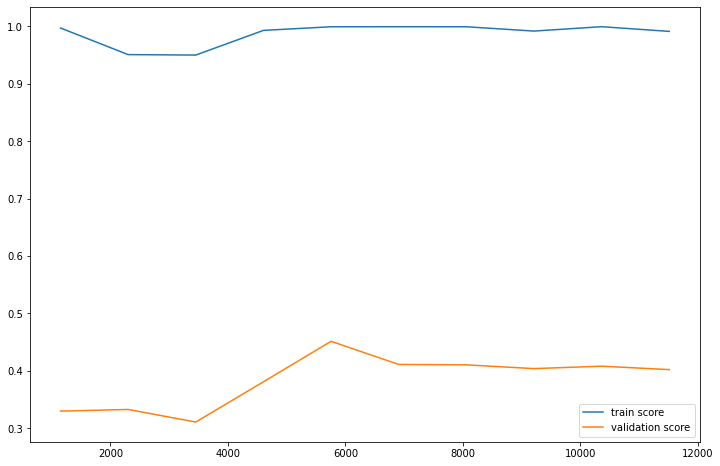

In [59]:

evaluation(model_2)

# On a identifier 92% des qui ne seron pas embaucher ok
# On a simplement defini les 30% des cas embauché pas terrible!!
# On a idetifier
# 
#  Dans ce cas il est tres util d'utiliser des learning curve pour comprendre 
# si notre modèle est en over ou endrt feetieng! il utilise la 
# cross validation pour entrainer et evaluer notre model sur plusieur splite
# de notre dataset

# en prenand le score f1 pour comprendre si notre modèle arrive a la fois
# d'idetifier les ca + et -

<AxesSubplot: >

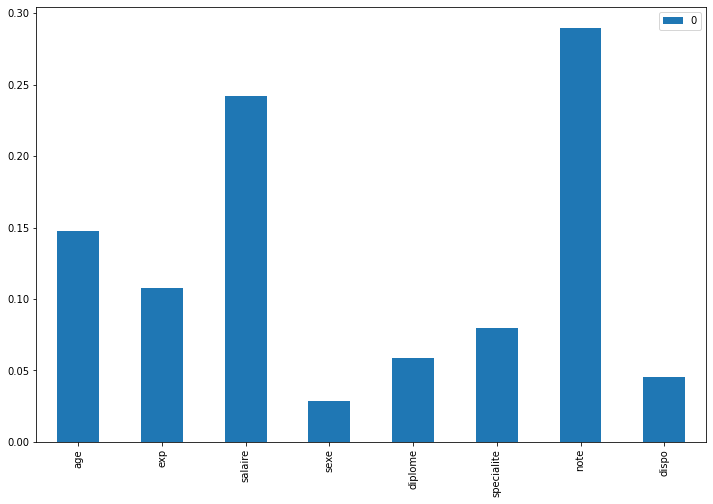

In [48]:
pd.DataFrame(model_1.feature_importances_, index=X_test.columns).plot.bar(figsize=(12, 8))

On voie de de suite que  notre modèle est en over feeting, ce ce dernier a 
un score de 100% dans la base de données de train par contre il est incapable de généralise 
sur des nouveau cas! score 45% dans le testset a partie de 6500 iteration et 
n'arrive plus à s'améliorer, à partir de là on peut essayer un autre classifier (svm..)
ou bien modifer notre dataset (fornir plus de données d'une manière intelligencte, ) 
on test des idées/hypothèses au au fure et à meseur pour améliorer la performannce du 
modèle en utulisant du featurs ingéneuring pour lutter contre cet over feeting


fillna ne marche pas fu tous !! même resultat

A present on va explorer un autre type d'idée qui peut nous permetre de luter contre 
l'over feeting est cette idée est la selection de variables 

à aprtir de l'entrainement de notre modèle on va utiliser l'ttribut featurn 
importance_  qui nous dit quelle sont les variables les plus importante dans 
la découpe des arbre de decision e puis ce tableau on va l'ingecter dans un datafram
pandas pour la quelle chaque valeur on auras la colone acosier, et on ce rend compte que
pour notre modèle ce sont les feature (age, salaire, note, et un peut d'experiance) 
qui l'intersse! Très logique NON !

c'est pas si surprenant car quand on a fait l'analyse target/variable on avaus vue
clarement que ces features (age, salaire, note, et un peut d'experiance) été clairement
en significatif du différence entre les ca (embauche=1 et embauche=0) et en 
obsèrve icu que la feature note exploqe completemnt le plafond, le salaire egalement et
ensuite en à l'age et l'experiance et le reste c'est intermédière. Donc à partir de 
ce graphiqye on peut faire deux choses : 

1) définir seuil au decu du quel les variable ne sont pas selectionnées ex : 0.05
2) determiner des featurs qui non pas d'importance pour notre modèle!
3) utilisation d'un modèle regulariser ou un modèle qui lute conte l'over feting, 
le tres bonne exemble c'est la readom forest. Ensuite nous allons utiliser le selector 
`select best key` qui utiliser une set statistique pour faire ca selection
(exemlme texte ``anova`) + une expention polynomial pour cree plen de variable, 
suivient d'un selectKeyBest ==> petite amélioration du recall! mausvais!
4) Grid search cv pour trouver les bon résultat et su tous ca ne marche pas 
on va utiliser d'autre classifière

A ce stade on a tester nos differentes idées du preprossesing

In [ ]:
pd.DataFrame(model_1.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))